In [2]:
import numpy as np
from math import log,sqrt
import matplotlib.pyplot as plt
import time
from statistics import mean
import seaborn as sns

# Optimisation de Quantile

Les theta que l'on souhaite optimiser

In [3]:
def thetaAlphaExp(l,a):
    """quantile d'ordre a théorique d'une distribution exponentielle"""
    return((-1/l) * log(1-a))

def thetaAlphaPar(pa,pb,a):  
    """quantile d'ordre a théorique d'une distribution de pareto"""
    return( pb*(1-a)**(-1/pa) )

## ROBBINS MONROE
On estime récursivement $\theta_\alpha$ avec une algorithme stochastique de type Robbins-Monro:
$$\hat{\theta}_{n+1} = \hat{\theta_n} - \gamma_n (I_{\{X_{n+1}\leq\hat{\theta}_n\}}-\alpha)$$
où la valeur initiale $θ_0$ est arbitrairement choisie à 0 et le pas $(γ_n)$ est une suite déterministe, positive et décroissante vers zéro, ici on a pris la suite $(1/n)_{i \in \mathbb{N}}$ satisfaisant les conditions classiques du théorème de
Robbins-Monro.

## EMPIRIQUE

In [4]:

def theta_hat(n,a,X):
    """ Estimation des n theta hat à l'aide d'un vecteur aléatoire de taille n """
    #X = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 
    tt = 1 #valeur initile de theta_hat
    pts = [tt] #liste des theta pour pouvoir les plot
    for i in range(1,n):
        if X[i+1] <= tt:
            tt = tt -  (1-a) / i
        else:
            tt = tt - (-a)/i
        pts +=[tt]
            
    return(pts)


def theta_hat_n(X,tt,i,a):
    """ Estimation du i-éme theta hat en fonction de la v.a X"""
    if X <= tt:
        ntt = tt -  (1-a) / i
    else:
        ntt = tt + a/i 
    return ntt

def est_empirique(X,a):
    x_sorted = sorted(X)
    return( x_sorted[int(len(X)*a)+1])

### Cas de la loi exponentielle

Pour étudier la convergence de l'algorithme sto nous allons estimer les quantile 0.25, 0.5 et 0.75 sur 10000 itérations. On s'interesse pour commencer à une distibution exponentielle de paramétre 1.

In [114]:
l = 1
n = 10**4

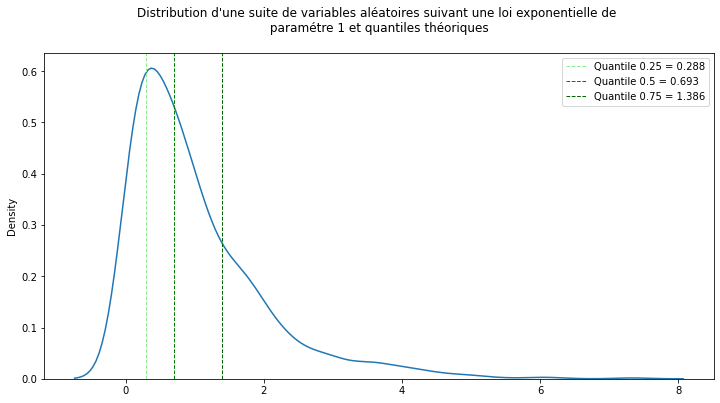

In [93]:
Xexpo = np.random.exponential(1/l,n+1) 

plt.figure(figsize=(12,6))
#g = sns.displot(Xexpo, kind="kde")
sns.kdeplot(np.random.exponential(1/l,1000))

plt.title("Distribution d'une suite de variables aléatoires suivant une loi exponentielle de \n paramétre 1 et quantiles théoriques \n")
plt.axvline(x = thetaAlphaExp(l,.25) , color = 'lightgreen', linestyle = '--', lw = 1,label = "Quantile 0.25 = "+str(round(thetaAlphaExp(l,.25),3)) )
plt.axvline(x = thetaAlphaExp(l,.5) , color = 'green', linestyle = '--', lw = 1,label = "Quantile 0.5 = "+str(round(thetaAlphaExp(l,.5),3)) ) 
plt.axvline(x = thetaAlphaExp(l,.75) , color = 'darkgreen', linestyle = '--', lw = 1,label = "Quantile 0.75 = "+str(round(thetaAlphaExp(l,.75),3)) ) 
plt.legend(loc = 'upper right')

### quantile 0.25

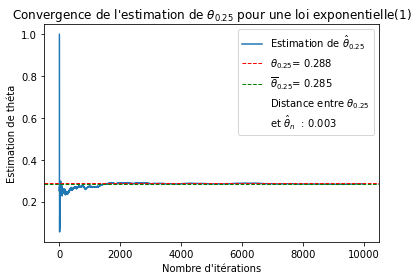

In [141]:
a = 0.25


Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 
pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
tb = est_empirique(Xe,a)
#plot
plt.plot(pts, label = r"Estimation de $\hat{\theta}_{0.25}$")
plt.title(r"Convergence de l'estimation de $\theta_{0.25}$ pour une loi exponentielle(" +str(l)+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itérations")
plt.axhline(y = thetaAlphaExp(l,a) , color = 'r', lw=1,linestyle = '--', label = r"$\theta_{0.25}$= "+str(round(thetaAlphaExp(l,a),3)) ) 
plt.axhline(y = tb , color = 'g', linestyle = '--',lw=1, label = r"$\overline{\theta}_{0.25}$= "+str(round(tb,3))) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label =r"Distance entre $\theta_{0.25}$" +" \n" +r"et $\hat{\theta}_{n}$  : " + str(round(abs(thetaAlphaExp(l,a)-pts[n-1]),3)))
plt.legend(loc = 'upper right')


plt.show()

Pour le quantile .25, l'estimation de theta chapeau semble converger vers le theta théorique qui est environ 0.288.

Pour vérifier cela, l'estimation est simuler 100 fois sur 100 vécteurs aléatoire i.i.d de taille 10^4 puis la moyenne de l'écart entre le dernier theta estimer et le theta theorique est caculé.

In [110]:
a = 0.25
n = 10**6
ta = thetaAlphaExp(l,a)
dis25 = []
dis25Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

    st = time.time()
    pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
    et = time.time()
    dis25 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis25Emp += [abs(ta-ptsEmp)]



In [111]:
print("Moyenne des écart pour RM: ", mean(dis25))
print("Moyenne des écart pour Emp: ", mean(dis25Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.0005333677735597975
Moyenne des écart pour Emp:  0.0005111817274856978
Temps moyen pour RM:  0.6871733236312866
Temps moyen pour Emp:  1.192670886516571


### quantile 0.5

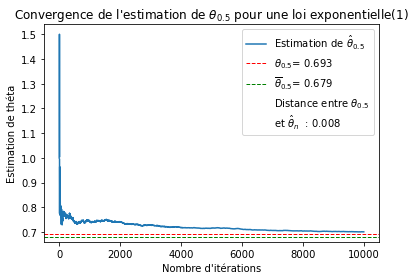

In [148]:
a = 0.5


Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 
pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
#plot
plt.plot(pts, label = r"Estimation de $\hat{\theta}_{0.5}$")
plt.title(r"Convergence de l'estimation de $\theta_{0.5}$ pour une loi exponentielle(" +str(l)+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itérations")
tb = est_empirique(Xe,a)
plt.axhline(y = thetaAlphaExp(l,a) , color = 'r', lw = 1,linestyle = '--', label = r"$\theta_{0.5}$= "+str(round(thetaAlphaExp(l,a),3)) ) 
plt.axhline(y = tb , color = 'g', linestyle = '--',lw = 1, label = r"$\overline{\theta}_{0.5}$= "+str(round(tb,3))) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label =r"Distance entre $\theta_{0.5}$" +" \n" +r"et $\hat{\theta}_{n}$  : " + str(round(abs(thetaAlphaExp(l,a)-pts[n-1]),3)))
plt.legend(loc = 'upper right')


plt.show()

In [102]:
a = 0.5
ta = thetaAlphaExp(l,a)
dis5 = []
dis5Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

    st = time.time()
    pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
    et = time.time()
    dis5 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis5Emp += [abs(ta-ptsEmp)]


In [104]:
print("Moyenne des écart pour RM: ", mean(dis5))
print("Moyenne des écart pour Emp: ", mean(dis5Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.014381318775957717
Moyenne des écart pour Emp:  0.008518201553776455
Temps moyen pour RM:  0.003079397678375244
Temps moyen pour Emp:  0.003358476161956787


### quantile 0.75

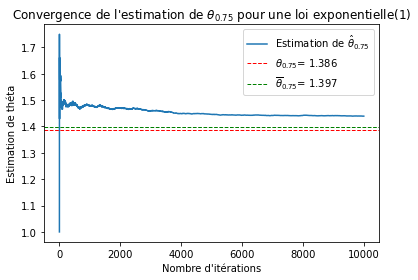

In [147]:
a = 0.75

Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 
pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
#plot
plt.plot(pts, label = r"Estimation de $\hat{\theta}_{0.75}$")
plt.title(r"Convergence de l'estimation de $\theta_{0.75}$ pour une loi exponentielle(" +str(l)+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itérations")
tb = est_empirique(Xe,a)
plt.axhline(y = thetaAlphaExp(l,a) , color = 'r', lw = 1,linestyle = '--', label = r"$\theta_{0.75}$= "+str(round(thetaAlphaExp(l,a),3)) ) 
plt.axhline(y = tb , color = 'g', linestyle = '--',lw = 1, label = r"$\overline{\theta}_{0.75}$= "+str(round(tb,3))) 
plt.legend(loc = 'upper right')


plt.show()

In [177]:
a = 0.75
ta = thetaAlphaExp(l,a)
dis75 = []
dis75Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

    st = time.time()
    pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
    et = time.time()
    dis75 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis75Emp += [abs(ta-ptsEmp)]

In [178]:
print("Moyenne des écart pour RM: ", mean(dis75))
print("Moyenne des écart pour Emp: ", mean(dis75Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.05578949683079114
Moyenne des écart pour Emp:  0.01273951537707231
Temps moyen pour RM:  0.0028545379638671873
Temps moyen pour Emp:  0.002652778625488281


## Cas de la loi de pareto

Toujours sur 10^4 itérations
parametre a = 2, b = 1


In [149]:
n = 10**4
pa = 2
pb = 1

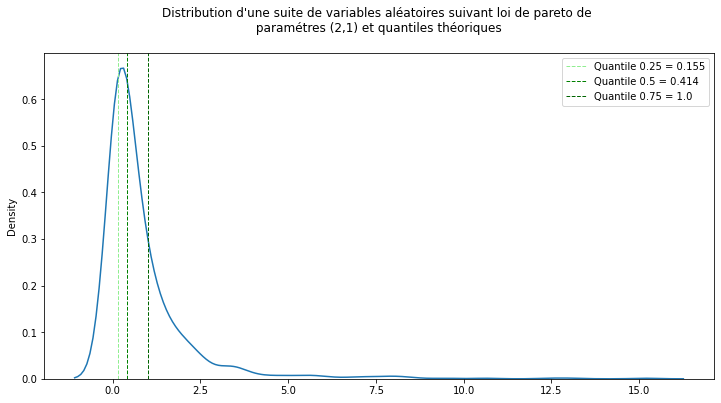

In [45]:
Xpar = np.random.pareto(pa,1000) *pb
plt.figure(figsize=(12,6))
#g = sns.displot(Xpar, kind="kde")
sns.kdeplot(np.random.pareto(pa, 1000)*pb)
plt.title("Distribution d'une suite de variables aléatoires suivant loi de pareto de \n paramétres (2,1) et quantiles théoriques \n")
plt.axvline(x = thetaAlphaPar(pa,pb,.25)-1 , color = 'lightgreen', linestyle = '--', lw = 1,label = "Quantile 0.25 = "+str(round(thetaAlphaPar(pa,pb,.25)-1,3)) )
plt.axvline(x = thetaAlphaPar(pa,pb,.5)-1 , color = 'green', linestyle = '--', lw = 1,label = "Quantile 0.5 = "+str(round(thetaAlphaPar(pa,pb,.5)-1,3)) ) 
plt.axvline(x = thetaAlphaPar(pa,pb,.75)-1 , color = 'darkgreen', linestyle = '--', lw = 1,label = "Quantile 0.75 = "+str(round(thetaAlphaPar(pa,pb,.75)-1,3)) ) 
plt.legend(loc = 'upper right')

### quantile 0.25

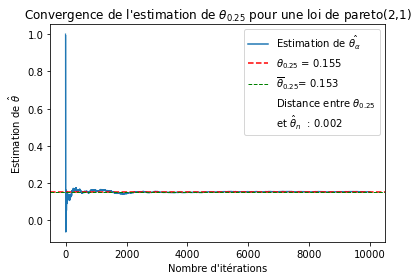

In [160]:

a = .25


Xp = np.random.pareto(pa,n+1) *pb
#y=np.percentile(Xp, a*100)
y = thetaAlphaPar(pa,pb,a)-1

pts = theta_hat(n,a,Xp)
plt.plot(pts, label = r'Estimation de $\hat{\theta_\alpha}$')
plt.title(r"Convergence de l'estimation de $\theta_{0.25}$ pour une loi de pareto("+str(pa)+","+str(pb)+")")
plt.ylabel(r"Estimation de $\hat{\theta}$")
plt.xlabel("Nombre d'itérations")
#pb*(1-a)**(-1/pa)
plt.axhline(y , color = 'r', linestyle = '--', label = r"$\theta_{0.25}$ = "+str(round(thetaAlphaPar(pa,pb,a)-1,3)) )
tb = est_empirique(Xp,a)
plt.axhline(y = tb , color = 'g', linestyle = '--',lw = 1, label = r"$\overline{\theta}_{0.25}$= "+str(round(tb,3))) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label =r"Distance entre $\theta_{0.25}$" +" \n" +r"et $\hat{\theta}_{n}$  : " + str(round(abs(thetaAlphaPar(pa,pb,a)-pts[n-1]-1),3)))
plt.legend(loc = 'upper right')

In [176]:
a = 0.25
n = 10**6
ta = thetaAlphaPar(pa,pb,a)  -1


dis25 = []
dis25Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xp = np.random.pareto(pa,n+1) *pb

    st = time.time()
    pts = theta_hat(n,a,Xp) #estimation des n theta chapeau
    et = time.time()
    dis25 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xp,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis25Emp += [abs(ta-ptsEmp)]

In [177]:
print("Moyenne des écart pour RM: ", mean(dis25))
print("Moyenne des écart pour Emp: ", mean(dis25Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.00026656552796121725
Moyenne des écart pour Emp:  0.0002571796862271847
Temps moyen pour RM:  1.1778267884254456
Temps moyen pour Emp:  1.9364897203445435


### quantile 0.5

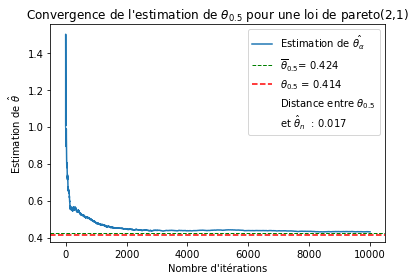

In [161]:
a = .5


Xp = np.random.pareto(pa,n+1) *pb
#y=np.percentile(Xp, a*100)
y = thetaAlphaPar(pa,pb,a)-1

pts = theta_hat(n,a,Xp)
plt.plot(pts, label = r'Estimation de $\hat{\theta_\alpha}$')
plt.title(r"Convergence de l'estimation de $\theta_{0.5}$ pour une loi de pareto("+str(pa)+","+str(pb)+")")
plt.ylabel(r"Estimation de $\hat{\theta}$")
plt.xlabel("Nombre d'itérations")
#pb*(1-a)**(-1/pa)
tb = est_empirique(Xp,a)
plt.axhline(y = tb , color = 'g', linestyle = '--',lw = 1, label = r"$\overline{\theta}_{0.5}$= "+str(round(tb,3))) 
plt.axhline(y , color = 'r', linestyle = '--', label = r"$\theta_{0.5}$ = "+str(round(thetaAlphaPar(pa,pb,a)-1,3)) )
plt.axhline(y = 1 , color = 'white', linestyle = '--', label =r"Distance entre $\theta_{0.5}$" +" \n" +r"et $\hat{\theta}_{n}$  : " + str(round(abs(thetaAlphaPar(pa,pb,a)-pts[n-1]-1),3)))
plt.legend(loc = 'upper right')

In [86]:
a = 0.5
ta = thetaAlphaPar(pa,pb,a)  -1
dis5 = []
dis5Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xp = np.random.pareto(pa,n+1) *pb

    st = time.time()
    pts = theta_hat(n,a,Xp) #estimation des n theta chapeau
    et = time.time()
    dis5 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xp,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis5Emp += [abs(ta-ptsEmp)]

In [88]:
print("Moyenne des écart pour RM: ", mean(dis5))
print("Moyenne des écart pour Emp: ", mean(dis5Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.0070042406399079115
Moyenne des écart pour Emp:  0.005160285745922981
Temps moyen pour RM:  0.003622136116027832
Temps moyen pour Emp:  0.002924816608428955


### Quantile 0.75

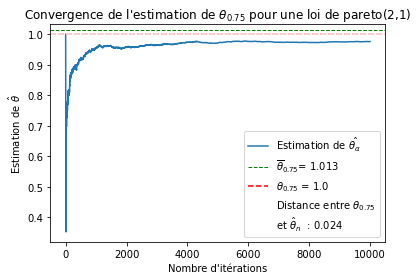

In [175]:
a = .75


Xp = np.random.pareto(pa,n+1) *pb
#y=np.percentile(Xp, a*100)
y = thetaAlphaPar(pa,pb,a)-1

pts = theta_hat(n,a,Xp)
plt.plot(pts, label = r'Estimation de $\hat{\theta_\alpha}$')
plt.title(r"Convergence de l'estimation de $\theta_{0.75}$ pour une loi de pareto("+str(pa)+","+str(pb)+")")
plt.ylabel(r"Estimation de $\hat{\theta}$")
plt.xlabel("Nombre d'itérations")
#pb*(1-a)**(-1/pa)
tb = est_empirique(Xp,a)
plt.axhline(y = tb , color = 'g', linestyle = '--',lw = 1, label = r"$\overline{\theta}_{0.75}$= "+str(round(tb,3))) 
plt.axhline(y , color = 'r', linestyle = '--', label = r"$\theta_{0.75}$ = "+str(round(thetaAlphaPar(pa,pb,a)-1,3)) )
plt.axhline(y = 1 , color = 'white', linestyle = '--', label =r"Distance entre $\theta_{0.75}$" +" \n" +r"et $\hat{\theta}_{n}$  : " + str(round(abs(thetaAlphaPar(pa,pb,a)-pts[n-1]-1),3)))
plt.legend(loc = 'lower right')

In [89]:
a = 0.75
ta = thetaAlphaPar(pa,pb,a)  -1
dis75 = []
dis75Emp = []
tpsHat = []
tpsEmp = []


for _ in range(100):    
    Xp = np.random.pareto(pa,n+1) *pb

    st = time.time()
    pts = theta_hat(n,a,Xp) #estimation des n theta chapeau
    et = time.time()
    dis75 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xp,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis75Emp += [abs(ta-ptsEmp)]

In [90]:
print("Moyenne des écart pour RM: ", mean(dis75))
print("Moyenne des écart pour Emp: ", mean(dis75Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.06161767119290563
Moyenne des écart pour Emp:  0.014772951729098005
Temps moyen pour RM:  0.003997752666473389
Temps moyen pour Emp:  0.0028351593017578126


## Quantile 0.25 et 0.75 selon les paramétres

### Exponentielle

In [187]:
a = .25

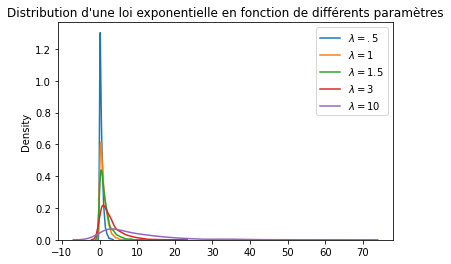

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#fixing the seed for reproducibility
#of the result
np.random.seed(10)

size = 1000
#plotting 1000 sample from 
#different exponential distribution
sns.kdeplot(np.random.exponential(.5, size))
sns.kdeplot(np.random.exponential(1, size))
sns.kdeplot(np.random.exponential(1.5, size))
sns.kdeplot(np.random.exponential(3, size))
sns.kdeplot(np.random.exponential(10, size))
plt.title(r"Distribution d'une loi exponentielle en fonction de différents paramètres")

plt.legend([r"$\lambda = .5$", 
            r"$\lambda = 1$", 
            r"$\lambda = 1.5$", 
            r"$\lambda = 3$", 
            r"$\lambda = 10$"])
plt.show()

In [ ]:
for _ in range(100):    
    Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

    st = time.time()
    pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
    et = time.time()
    dis75 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis75Emp += [abs(ta-ptsEmp)]

In [32]:
thetaAlphaExp(L[0],a)
[abs(ta-ptsEmp)]
pts[0]

0.5753641449035618

In [223]:
L = [.5,1.5,3,10]
n = 10**4
a = 0.25

disSto = []
disEmp = []
tpsHat = []
tpsEmp = []

for l in L:
    ta = thetaAlphaExp(l,a)
    pts = []
    disS = []
    disE = []
    tpsH = []
    tpsE = []
    for _ in range(100):    
        Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

        st = time.time()
        pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
        et = time.time()
        disS += [abs(ta-pts[n-1])]
        tpsH += [et-st]

        st = time.time()
        ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
        et = time.time()
        tpsE += [et-st]
        disE += [abs(ta-ptsEmp)]

    disSto += [disS]
    disEmp += [disE]
    tpsHat += [tpsH]
    tpsEmp += [tpsE]


In [224]:
print(mean(disSto[0]))
print(mean(disSto[1]))
print(mean(disSto[2]))
print(mean(disSto[3]))

0.02935028774657883
0.003047382533476428
0.0018039987905157848
0.0010327422116877191


In [225]:
print(mean(disEmp[0]))
print(mean(disEmp[1]))
print(mean(disEmp[2]))
print(mean(disEmp[3]))

0.009647095465334104
0.002956160220643893
0.001675962706532022
0.0004835560751804947


In [226]:
print(mean(tpsEmp[0]))
print(mean(tpsEmp[1]))
print(mean(tpsEmp[2]))
print(mean(tpsEmp[3]))

0.004106581211090088
0.004166615009307861
0.003260529041290283
0.003906104564666748


In [227]:
print(mean(tpsHat[0]))
print(mean(tpsHat[1]))
print(mean(tpsHat[2]))
print(mean(tpsHat[3]))

0.0036939334869384765
0.003408074378967285
0.003559308052062988
0.004404881000518799


In [228]:
L = [.5,1.5,3,10]
n = 10**4

disSto = []
disEmp = []
tpsHat = []
tpsEmp = []

for l in L:
    pts = []
    disS = []
    disE = []
    tpsH = []
    tpsE = []
    for _ in range(100):    
        Xp = np.random.pareto(pa,n+1) *pb

        st = time.time()
        pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
        et = time.time()
        disS += [abs(ta-pts[n-1])]
        tpsH += [et-st]

        st = time.time()
        ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
        et = time.time()
        tpsE += [et-st]
        disE += [abs(ta-ptsEmp)]

    disSto += [disS]
    disEmp += [disE]
    tpsHat += [tpsH]
    tpsEmp += [tpsE]


In [229]:
print(mean(disSto[0]))
print(mean(disSto[1]))
print(mean(disSto[2]))
print(mean(disSto[3]))

0.0017040147088547598
0.0017040147088547598
0.0017040147088547598
0.0017040147088547598


In [230]:
print(mean(disEmp[0]))
print(mean(disEmp[1]))
print(mean(disEmp[2]))
print(mean(disEmp[3]))

0.0005933283152979238
0.0005933283152979238
0.0005933283152979238
0.0005933283152979238


In [231]:
print(mean(tpsEmp[0]))
print(mean(tpsEmp[1]))
print(mean(tpsEmp[2]))
print(mean(tpsEmp[3]))

0.005444808006286621
0.0035529398918151857
0.0033666276931762695
0.0036898946762084963


In [232]:
print(mean(tpsHat[0]))
print(mean(tpsHat[1]))
print(mean(tpsHat[2]))
print(mean(tpsHat[3]))

0.004206233024597168
0.004879095554351807
0.00450035572052002
0.0032440710067749025


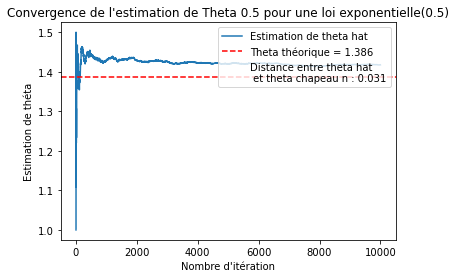

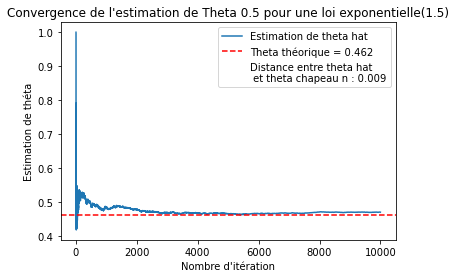

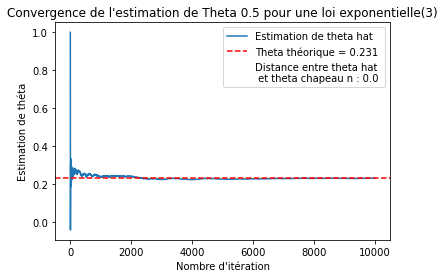

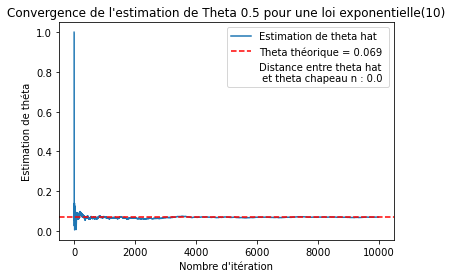

In [219]:

plt.plot(pts[0], label = r'Estimation de theta hat')
plt.title("Convergence de l'estimation de Theta "+str(a)+" pour une loi exponentielle(" +str(L[0])+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itération")
plt.axhline(y = thetaAlphaExp(L[0],a) , color = 'r', linestyle = '--', label = "Theta théorique = "+str(round(thetaAlphaExp(L[0],a),3)) ) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label ="Distance entre theta hat \n et theta chapeau n : " + str(round(abs(thetaAlphaExp(L[0],a)-pts[0][n-1]),3)))
plt.legend(loc = 'upper right')
plt.show()

plt.plot(pts[1], label = r'Estimation de theta hat')
plt.title("Convergence de l'estimation de Theta "+str(a)+" pour une loi exponentielle(" +str(L[1])+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itération")
plt.axhline(y = thetaAlphaExp(L[1],a) , color = 'r', linestyle = '--', label = "Theta théorique = "+str(round(thetaAlphaExp(L[1],a),3)) ) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label ="Distance entre theta hat \n et theta chapeau n : " + str(round(abs(thetaAlphaExp(L[1],a)-pts[1][n-1]),3)))
plt.legend(loc = 'upper right')
plt.show()
 
plt.plot(pts[2], label = r'Estimation de theta hat')
plt.title("Convergence de l'estimation de Theta "+str(a)+" pour une loi exponentielle(" +str(L[2])+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itération")
plt.axhline(y = thetaAlphaExp(L[2],a) , color = 'r', linestyle = '--', label = "Theta théorique = "+str(round(thetaAlphaExp(L[2],a),3)) ) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label ="Distance entre theta hat \n et theta chapeau n : " + str(round(abs(thetaAlphaExp(L[2],a)-pts[2][n-1]),3)))
plt.legend(loc = 'upper right')
plt.show()
  
plt.plot(pts[3], label = r'Estimation de theta hat')
plt.title("Convergence de l'estimation de Theta "+str(a)+" pour une loi exponentielle(" +str(L[3])+")")
plt.ylabel("Estimation de théta")
plt.xlabel("Nombre d'itération")
plt.axhline(y = thetaAlphaExp(L[3],a) , color = 'r', linestyle = '--', label = "Theta théorique = "+str(round(thetaAlphaExp(L[3],a),3)) ) 
plt.axhline(y = 1 , color = 'white', linestyle = '--', label ="Distance entre theta hat \n et theta chapeau n : " + str(round(abs(thetaAlphaExp(L[3],a)-pts[3][n-1]),3)))
plt.legend(loc = 'upper right')
plt.show()

#plt.plot(pts, label = r'Estimation de theta hat')
#plt.title("Convergence de l'estimation de Theta "+str(a)+" pour une loi exponentielle(" +str(l)+")")
#plt.ylabel("Estimation de théta")
#plt.xlabel("Nombre d'itération")
#plt.axhline(y = thetaAlphaExp(l,a) , color = 'r', linestyle = '--', label = "Theta théorique = "+str(round(thetaAlphaExp(l,a),3)) ) 
#plt.axhline(y = 1 , color = 'white', linestyle = '--', label ="Distance entre theta hat \n et theta chapeau n : " + str(round(abs(thetaAlphaExp(l,a)-pts[n-1]),3)))
#plt.legend(loc = 'upper right')

In [ ]:
L = [.5,1.5,3,10]
n = 10**4
a = 0.75

disSto = []
disEmp = []
tpsHat = []
tpsEmp = []

for l in L:
    ta = thetaAlphaExp(l,a)
    pts = []
    disS = []
    disE = []
    tpsH = []
    tpsE = []
    for _ in range(100):    
        Xe = np.random.exponential(1/l,n+1) #liste de v.a exp(1/l) de taille n+1 

        st = time.time()
        pts = theta_hat(n,a,Xe) #estimation des n theta chapeau
        et = time.time()
        disS += [abs(ta-pts[n-1])]
        tpsH += [et-st]

        st = time.time()
        ptsEmp = est_empirique(Xe,a) #estimation des n theta chapeau
        et = time.time()
        tpsE += [et-st]
        disE += [abs(ta-ptsEmp)]

    disSto += [disS]
    disEmp += [disE]
    tpsHat += [tpsH]
    tpsEmp += [tpsE]


# Loi normale

No handles with labels found to put in legend.


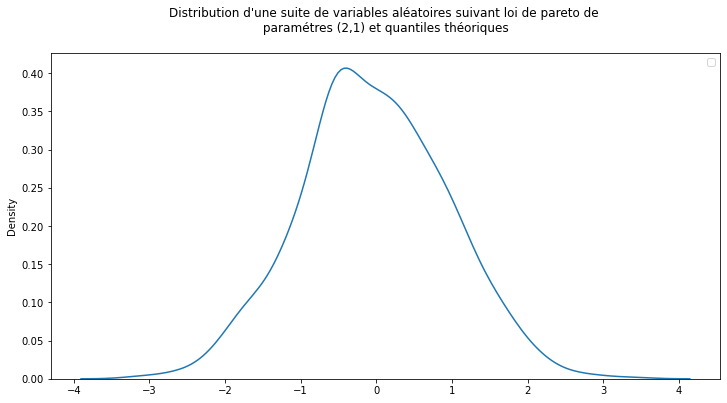

In [179]:
Xnorm = np.random.normal(0,1,1000) 
plt.figure(figsize=(12,6))
#g = sns.displot(Xpar, kind="kde")
sns.kdeplot(np.random.normal(0,1,1000) )
plt.title("Distribution d'une suite de variables aléatoires suivant loi de pareto de \n paramétres (2,1) et quantiles théoriques \n")
#plt.axvline(x = thetaAlphaPar(pa,pb,.25)-1 , color = 'lightgreen', linestyle = '--', lw = 1,label = "Quantile 0.25 = "+str(round(thetaAlphaPar(pa,pb,.25)-1,3)) )
#plt.axvline(x = thetaAlphaPar(pa,pb,.5)-1 , color = 'green', linestyle = '--', lw = 1,label = "Quantile 0.5 = "+str(round(thetaAlphaPar(pa,pb,.5)-1,3)) ) 
#plt.axvline(x = thetaAlphaPar(pa,pb,.75)-1 , color = 'darkgreen', linestyle = '--', lw = 1,label = "Quantile 0.75 = "+str(round(thetaAlphaPar(pa,pb,.75)-1,3)) ) 
plt.legend(loc = 'upper right')

On suppose le quantile 0.5 à 0 pour une loi normale (0,1)

In [12]:
a = .5
n = 10**4
pts = []
dis5 = []
tpsHat = []
dis5Emp = []
tpsEmp = []
ta  = 0
for _ in range(100):    
    Xnorm = np.random.normal(0,1,n+1) 

    st = time.time()
    pts = theta_hat(n,a,Xnorm) #estimation des n theta chapeau
    et = time.time()
    dis5 += [abs(ta-pts[n-1])]
    tpsHat += [et-st]

    st = time.time()
    ptsEmp = est_empirique(Xnorm,a) #estimation des n theta chapeau
    et = time.time()
    tpsEmp += [et-st]
    dis5Emp += [abs(ta-ptsEmp)]

In [14]:
print("Moyenne des écart pour RM: ", mean(dis5))
print("Moyenne des écart pour Emp: ", mean(dis5Emp))

print("Temps moyen pour RM: ", mean(tpsHat))
print("Temps moyen pour Emp: ", mean(tpsEmp))

Moyenne des écart pour RM:  0.028611450717997457
Moyenne des écart pour Emp:  0.009790748264675093
Temps moyen pour RM:  0.0030152392387390137
Temps moyen pour Emp:  0.0037654924392700197


# Normalité Asymptotique

**Pour La loi exponentielle :**

**Estimateur empirique**

0.11111111111111112


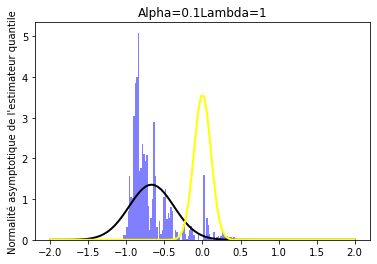

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import decimal
import time


n=10000

#

#Paramètre de l'ordre du quantile
alpha = 0.1
beta=1
strAlpha=str(alpha)
strLambda=str(beta)
# Générer les variables aléatoires iid
X = np.random.exponential(1/beta,size=n)



# Calculer le quantile empirique
q = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta #quantile d'ordre alpha


for i in range(1,n):
    q[i] = sorted(X[:i+1])[int(alpha*i)+1]
    a[i] = math.sqrt(i)*(q[i]-y)
    
#Tracer la convergence presque sûre

#plt.plot(q)
#plt.axhline(y, color='r', linestyle='--')
#plt.xlabel('n')
#plt.ylabel('Alpha='+strAlpha)
#plt.title('Lambda='+strLambda)
#plt.show()



plt.hist(a, bins=100, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)*math.exp(2*beta*y)/(beta**2)
print(ecarttype)
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0,  linewidth=2,color='yellow')




plt.xlabel("")
plt.ylabel('Normalité asymptotique de l\'estimateur quantile')
plt.title('Alpha='+strAlpha+'Lambda='+strLambda)

plt.show() 



**Estimateur Stochastique Robbins Monro**

0.5108256237659907
1.2000000000000002


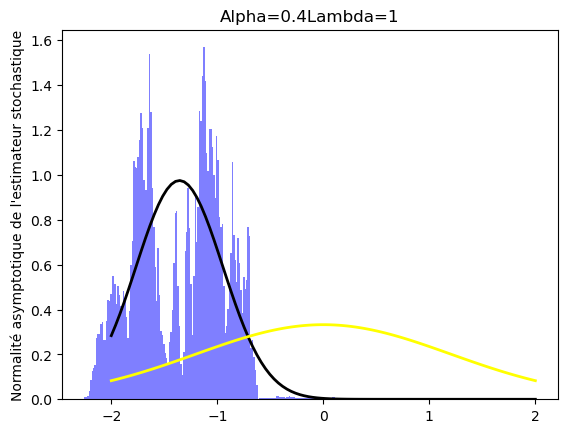

1.2000000000000002
0.40922451927930004


In [ ]:

beta=1
alpha=0.1
n=2000000

X = np.random.exponential(1/beta,size=n)

strAlpha=str(alpha)
strLambda=str(beta)

# Calculer le quantile empirique
q = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta
for i in range(1,n-1):
    if X[i+1]<q[i]:
        q[i+1] = q[i]-(1/i)*(1-alpha)
    else:
        q[i+1] = q[i]-(1/i)*(-alpha)
    a[i] = math.sqrt(i)*(q[i]-y)
    
    
# Tracer la convergence presque sûre
#y=np.percentile(X, alpha*100)

y=-math.log(1-alpha)/beta
print(y)
#plt.plot(q)
#plt.axhline(y, color='r', linestyle='--')
#plt.xlabel('n')
#plt.ylabel('Quantile empirique')
#plt.title('Convergence presque sûre du quantile empirique')
#plt.show()

plt.hist(a, bins=200, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)/(2*beta*math.exp(-beta*y)-1)
print(ecarttype)
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0,  linewidth=2,color='yellow')




plt.xlabel("")
plt.ylabel('Normalité asymptotique de l\'estimateur stochastique')
plt.title('Alpha='+strAlpha+'Lambda='+strLambda)


plt.show()
print(ecarttype)
print(np.std(a))

**Estimateur plus réaliste**

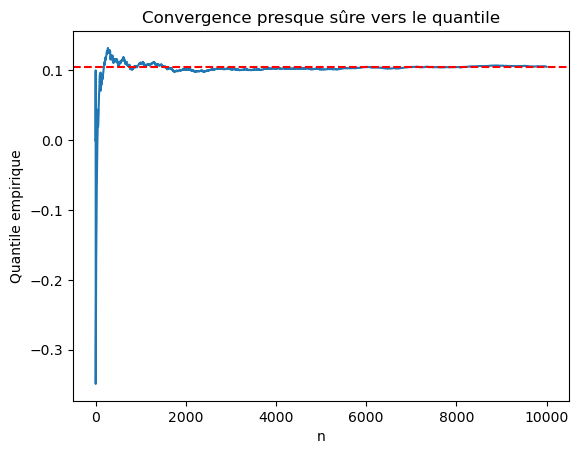

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


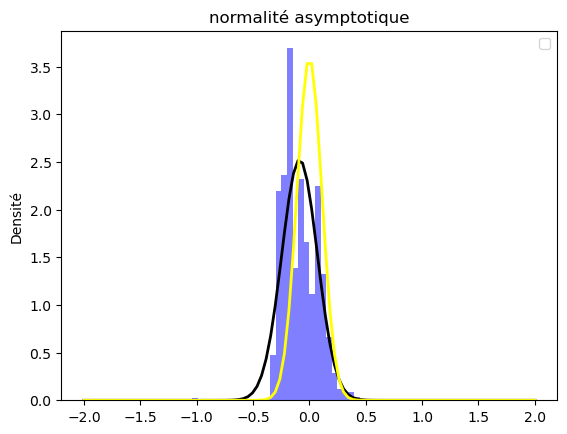

In [ ]:
n=10000

#Paramètre de l'ordre du quantile
alpha = 0.1
beta=1

p=1/4
q=1/2
phi=0
strp=str(p)
strq=str(q)

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K
# Générer les variables aléatoires iid
X = np.random.exponential(1/beta,size=n)


# Calculer le quantile empirique
thet = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta #quantile d'ordre alpha


for i in range(1,n-1):
    if X[i+1]<thet[i]:
        ind = 1
    else:
        ind = 0
    thet[i+1] = thet[i] - ( (1/i) * (1/ (phi + (1/i)**p ) ) ) * (ind - alpha )
    phi = (1-1/i)*phi + (1/i)*((i+1)**q)*K((thet[i]-X[i+1])*(i+1)**q)
    a[i] = math.sqrt(i)*(thet[i]-y)
    
# Tracer la convergence presque sûre

plt.plot(thet)
plt.axhline(y, color='r', linestyle='--')
plt.xlabel('n')
plt.ylabel('Quantile empirique')
plt.title('Convergence presque sûre vers le quantile')
plt.show()

plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)

p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*((1-alpha)*(math.exp(2*beta*y)))/beta**2
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0, linewidth=2,color='yellow')



plt.xlabel("")
plt.ylabel("Densité")
plt.title("normalité asymptotique")
plt.legend()


plt.show()

**La décroissance des erreurs quadratiques moyennes:**

**1.Pour Theta barre(estimateur empirique)**

In [ ]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    q = np.zeros(n)
    
    for j in range(1,n):
        q[j] = np.sort((X[:j+1]))[int(alpha*j)+1] #calcul de quantile empirique
    

    Err0 = np.mean((q - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()



**2.Pour Theta chapeau ( estimateur stochastique Robbins Monro)**

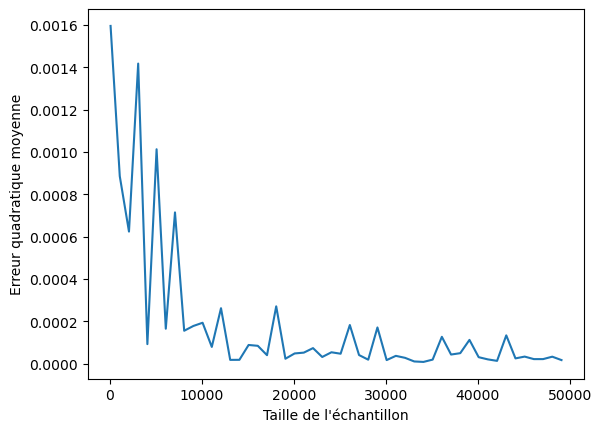

In [ ]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    q = np.zeros(n)
    
    for j in range(1,n-1):
            if X[j+1]<q[j]:
                q[j+1] = q[j]-(1/j)*(1-alpha)
            else:
                q[j+1] = q[j]-(1/j)*(-alpha)
    

    Err0 = np.mean((q - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

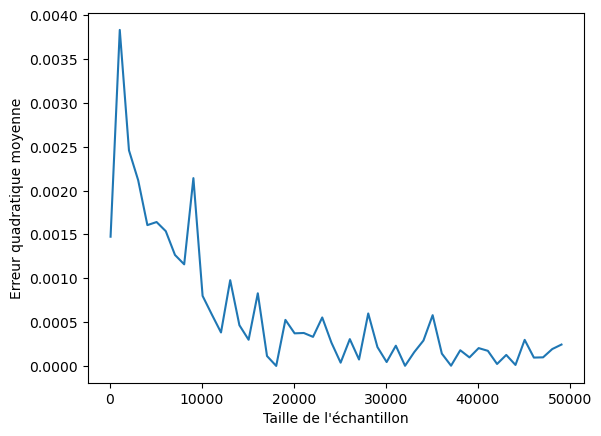

In [ ]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


p=1/4
q=1/2
phi=0
strp=str(p)
strq=str(q)

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    thet = np.zeros(n)
    
    for j in range(1,n-1):
            if X[j+1]<thet[j]:
                ind = 1  #indicatrice
            else:
                ind = 0  #indicatrice
            thet[j+1] = thet[j] - ( (1/j) * (1/ (phi + (1/j)**p ) ) ) * (ind - alpha )
            phi = (1-1/j)*phi + (1/j)*((i+1)**q)*K((thet[j]-X[j+1])*(j+1)**q)
            

    Err0 = np.mean((thet - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

**Loi de Pareto**

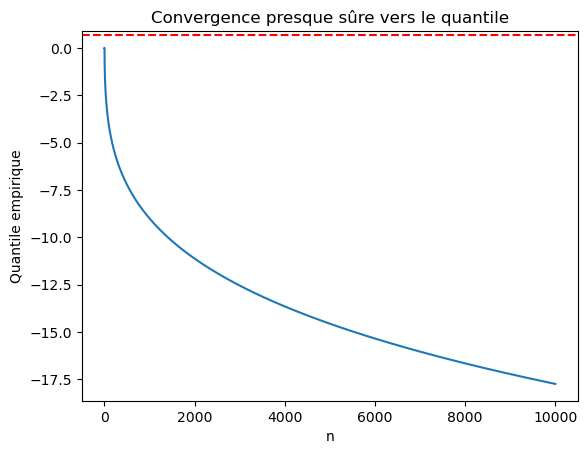

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


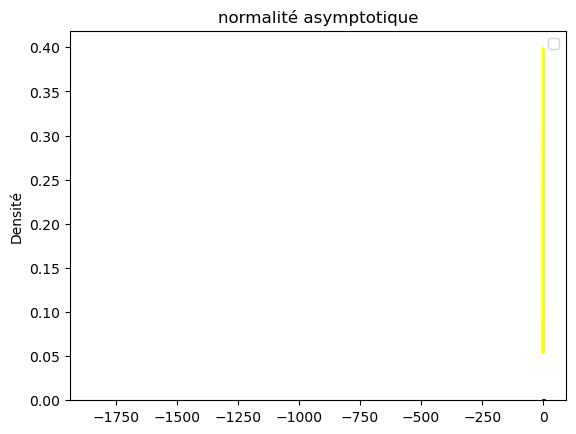

In [ ]:
n=10000

#Paramètre de l'ordre du quantile
alpha = 0.5
beta=1

p=1/4
q=1/2
phi=0

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K
# Générer les variables aléatoires iid
X = np.random.exponential(1/beta,size=n)


# Calculer le quantile empirique
thet = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/b #quantile d'ordre alpha


for i in range(1,n-1):
    if X[i+1]<thet[i]:
        ind = 1
    else:
        ind = 0
    thet[i+1] = thet[i] - ( (1/i) * (1/ (phi + (1/i)**p ) ) ) * (1 - alpha )
    phi = (1-1/i)*phi + (1/i)*((i+1)**q)*K((thet[i]-X[i+1])*(i+1)**q)
    a[i] = math.sqrt(i)*(thet[i]-y)
    
# Tracer la convergence presque sûre

plt.plot(thet)
plt.axhline(y, color='r', linestyle='--')
plt.xlabel('n')
plt.ylabel('Quantile empirique')
plt.title('Convergence presque sûre vers le quantile')
plt.show()

plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)

p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*((1-alpha)*(math.exp(2*beta*y)))/beta**2
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0, linewidth=2,color='yellow')



plt.xlabel("")
plt.ylabel("Densité")
plt.title("normalité asymptotique")
plt.legend()


plt.show()